# GUIA 1 - Procesamiento de Imagenes
Grupo 4 <br>
Integrantes:
- Pablo Smolkin
- Pedro Carranza Vélez
- Philippe Dutriez Diaz
- Francisco Daniel Ledesma

***

In [3]:
from functions import *

In [4]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


***

### Ejercicio 1
Modelamos el ojo como un sistema lente-sensor Podemos simplificar nuestro modelo
asumiendo que el “sensor” está compuesto por los conos, con una densidad constante de
150000 elementos por mm2, y posee un área de 1.5mm x 1.5mm.<br>
Suponiendo que dejamos de ver algo cuando el área de la imagen del objeto se hace menor
que el tamaño de un cono del sensor, calcular el tamaño del menor punto visible sobre una
pantalla de LCD de un celular que se encuentra a 30 cm de nuestros ojos. Comparar este
resultado con el tamaño de los pixeles en los teléfonos modernos.

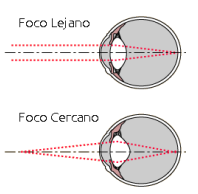

In [5]:
densidad = 150000 # conos/mm^2
area = 1.5**2 #mm2
n_conos = densidad*area
print("Cantidad de conos:", n_conos)

Cantidad de conos: 337500.0


In [6]:
Area_cono = 1/densidad
lado_cono =  math.sqrt(Area_cono)*1e-3 #metros
print("El lado del cono sera:", round(lado_cono*1e6,4), "µm")

El lado del cono sera: 2.582 µm


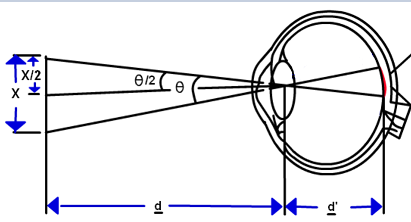

In [7]:
d = 300 #mm
d_prima = 17 #mm
X = lado_cono*d/d_prima
print("Minimo tamaño:",round(X*1e6,2),"µm")
d_prima = 14 #mm
X = lado_cono*d/d_prima
print("Maximo tamaño:",round(X*1e6,2),"µm")

Minimo tamaño: 45.56 µm
Maximo tamaño: 55.33 µm


Calculo el tamaño de pixel de pantalla

In [29]:
s_width = 2248  #pixels
s_height = 1080 #pixels
diagonal = 6.21 #inches
getPixelSize(s_width, s_height, diagonal)

lado pixel: 63.2461 µm


***

### Ejercicio 4. 
Generar  en  Matlab  dos  imágenes  de  3  pixeles  x  3  pixeles.  En  ambos  casos  el  pixel  central debe tener un valor de 127. Los pixeles vecinos deben tener un valor de 63, y 223 en cada caso.

La luminancia del pixel central es la misma en cada caso, pero perceptualmente no poseen el  mismo  brillo.  Variar  la  luminancia  del  pixel  central  de  una  de  las  imágenes,  hasta  que perceptualmente ambas posean el mismo brillo. ¿Qué valor se obtiene? Probar con diferentes valores para los pixeles externos. Extraer conclusiones.

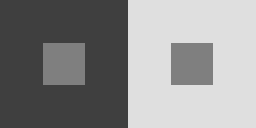

In [9]:
sq1 = makeSquare(sides_value=63, center_value=127)
sq2 = makeSquare(sides_value=223, center_value=127)

squares = Image.fromarray(np.concatenate((sq1, sq2), axis=1))
displayImage(squares, 256, 128)

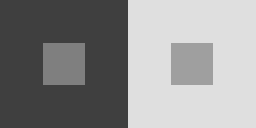

In [10]:
sq1 = makeSquare(sides_value=63, center_value=127)
sq2 = makeSquare(sides_value=223, center_value=159)

squares = Image.fromarray(np.concatenate((sq1, sq2), axis=1))
displayImage(squares, 256, 128)

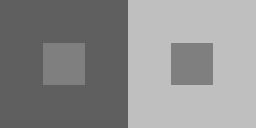

In [11]:
sq1 = makeSquare(sides_value=95, center_value=127)
sq2 = makeSquare(sides_value=191, center_value=127)

squares = Image.fromarray(np.concatenate((sq1, sq2), axis=1))
displayImage(squares, 256, 128)

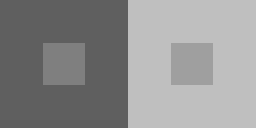

In [12]:
sq1 = makeSquare(sides_value=95, center_value=127)
sq2 = makeSquare(sides_value=191, center_value=159)

squares = Image.fromarray(np.concatenate((sq1, sq2), axis=1))
displayImage(squares, 256, 128)

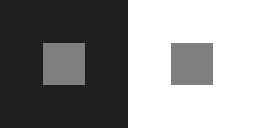

In [13]:
sq1 = makeSquare(sides_value=31, center_value=127)
sq2 = makeSquare(sides_value=255, center_value=127)

squares = Image.fromarray(np.concatenate((sq1, sq2), axis=1))
displayImage(squares, 256, 128)

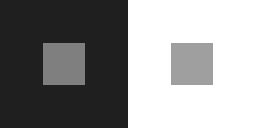

In [14]:
sq1 = makeSquare(sides_value=31, center_value=127)
sq2 = makeSquare(sides_value=255, center_value=159)

squares = Image.fromarray(np.concatenate((sq1, sq2), axis=1))
displayImage(squares, 256, 128)

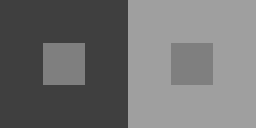

In [15]:
sq1 = makeSquare(sides_value=63, center_value=127)
sq2 = makeSquare(sides_value=159, center_value=127)

squares = Image.fromarray(np.concatenate((sq1, sq2), axis=1))
displayImage(squares, 256, 128)

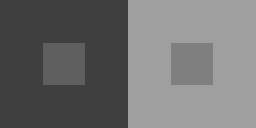

In [16]:
sq1 = makeSquare(sides_value=63, center_value=95)
sq2 = makeSquare(sides_value=159, center_value=127)

squares = Image.fromarray(np.concatenate((sq1, sq2), axis=1))
displayImage(squares, 256, 128)

Observando los tres ejemplos anteriores, el factor que parece conseguir el mismo brillo perceptual es la diferencia entre la luminosidad de los bordes y la del pixel central. Los tres casos con esta característica cumplen la relación

$centerValue_1 - sidesValue_1 = sidesValue_2 - centerValue_2$ (a)

En los tres casos donde los valores centrales son iguales, pero 

$centerValue_1 - sidesValue_1 < sidesValue_2 - centerValue_2$

el pixel central del cuadrado 2 se percibe como más oscuro.

Sin embargo, el último caso muestra que 

$centerValue_1 - sidesValue_1 > sidesValue_2 - centerValue_2$

Y *nuevamente* el pixel central de la derecha se percive como más oscuro. Esto parece indicar una función de intensidad relativa con un máximo en el punto (a).

***

### Ejercicio 5. 
#### Se desea decimar la imagen "mono.bmp"

256 256


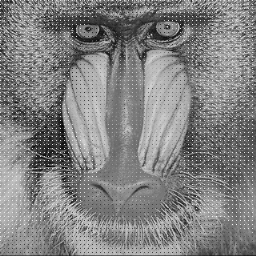

In [17]:
harambe = Image.open("consigna/mono.bmp")
w, h = harambe.size
print(w, h)
displayImage(harambe, 256, 256)

#### Dividir la imágen en bloques de 4x4 pixeles, y quedarse con el pixel en la posición (1,1) 

Con nuestro tiling:

In [18]:
N, M = 4, 4
im_tiled = tileImage(harambe, N, M)

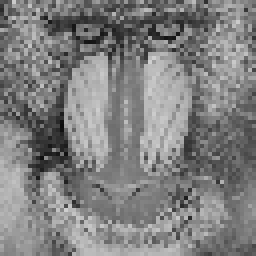

In [19]:
mat_A = pickPixelfromTile(im_tiled, (1,1))
img_A = Image.fromarray(mat_A)
displayImage(img_A, 256, 256)

Con skimage:

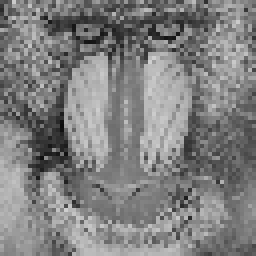

In [20]:
mat_A = block_reduce(np.asarray(harambe), block_size=(4, 4), func=lambda blocks, pixel_pos, axis: pickPixelfromTile(blocks, pixel_pos), func_kwargs={'pixel_pos': (1,1)})
img_A = Image.fromarray(mat_A)
displayImage(img_A, 256, 256)

#### Repetir la decimación tomando el pixel en la posición (0,0) 

Con nuestro tiling:

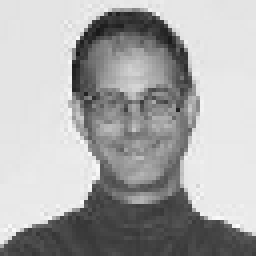

In [21]:
mat_B = pickPixelfromTile(im_tiled, (0,0))
img_B = Image.fromarray(mat_B)
displayImage(img_B, 256, 256)

Con skimage:

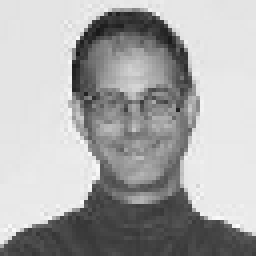

In [22]:
mat_B = block_reduce(np.asarray(harambe), block_size=(4, 4), func=lambda blocks, pixel_pos, axis: pickPixelfromTile(blocks, pixel_pos), func_kwargs={'pixel_pos': (0,0)})
img_B = Image.fromarray(mat_B)
displayImage(img_B, 256, 256)

#### Repetir tomando el promedio de los 16 puntos

Con nuestro tiling:

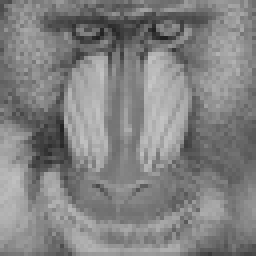

In [23]:
mat_C = avgTiles(im_tiled)
img_C = Image.fromarray(mat_C)
displayImage(img_C, 256, 256)

Con skimage:

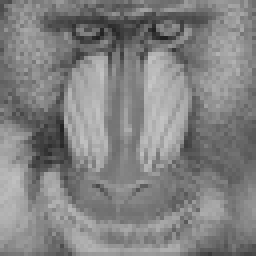

In [24]:
mat_C = block_reduce(np.asarray(harambe), block_size=(4, 4), func=np.mean).astype(np.uint8)
img_C = Image.fromarray(mat_C)
displayImage(img_C, 256, 256)

### Interpolación Bilinear
A continuación se expande la imagen comprimida de vuelta a la resolución original por medio de un algoritmo de interpolación bilinear desarrollada por el grupo.

In [25]:
from interpolation import *

#### Decimación tomando el pixel (1,1)

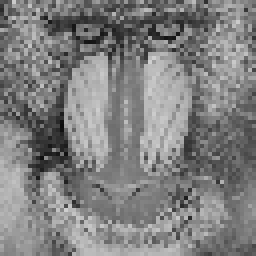

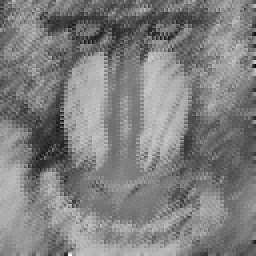

In [26]:
bilinear_mat_A = bilinear_interpolation(mat_A, (256,256))
bilinear_img_A = Image.fromarray(bilinear_mat_A).convert("L")
displayImage(img_A, 256, 256)
displayImage(bilinear_img_A, 256, 256)

#### Decimación tomando el pixel (0,0)

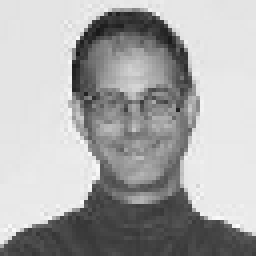

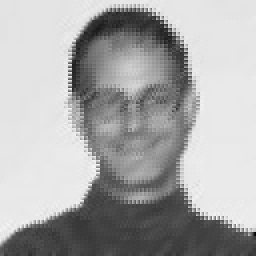

In [27]:
bilinear_mat_B = bilinear_interpolation(mat_B, (256,256))
bilinear_img_B = Image.fromarray(bilinear_mat_B).convert("L")
displayImage(img_B, 256, 256)
displayImage(bilinear_img_B, 256, 256)

#### Decimación tomando el promedio

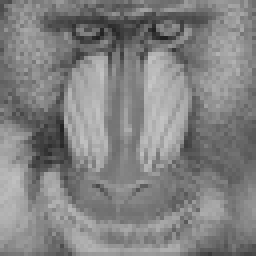

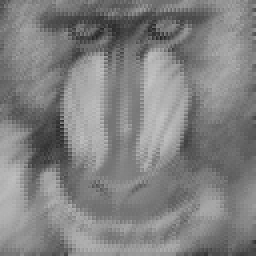

In [28]:
bilinear_mat_C = bilinear_interpolation(mat_C, (256,256))
bilinear_img_C = Image.fromarray(bilinear_mat_C).convert("L")
displayImage(img_C, 256, 256)
displayImage(bilinear_img_C, 256, 256)